In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df_cf = pd.read_csv('C:/Users/benan/Downloads/Customer_Feedback_Data.csv')
df_po = pd.read_csv("C:/Users/benan/Downloads/Product_Offering_Data.csv")
df_td = pd.read_csv('C:/Users/benan/Downloads/Transaction_Data.csv')

## **1ST STEP: DATA PREPROCESSING**

## CUSTOMER FEEDBACK DATA

**CLEANING THE DATA**

In [6]:
##IMPUTATION FOR SATISFACTION SCORE: MEAN METHOD

df_cf['Satisfaction_Score'] = df_cf['Satisfaction_Score'].fillna(df_cf['Satisfaction_Score'].mean())

In [7]:
df_cf.isnull().sum()

Customer_ID                0
Satisfaction_Score         0
Feedback_Comments          0
Likelihood_to_Recommend    0
dtype: int64

**=====================================**

**Handling Outliers**

In [10]:
##OUTLIERS: IQR METHOD

q1 = df_cf['Satisfaction_Score'].quantile(0.25)
q3 = df_cf['Satisfaction_Score'].quantile(0.75)
IQR = q3 - q1

upper_limit = q3 + 1.5 * IQR

df_cf['Satisfaction_Score'] = df_cf['Satisfaction_Score'].apply(lambda x: min(x, upper_limit))

In [11]:
df_cf.describe()

,Customer_ID,Satisfaction_Score,Likelihood_to_Recommend
count,5050.000000,5050.000000,5050.000000
mean,501.949703,5.605973,5.571287
std,288.806331,2.834285,2.872577
min,1.000000,1.000000,1.000000
25%,253.000000,3.000000,3.000000
50%,502.000000,6.000000,6.000000
75%,751.750000,8.000000,8.000000
max,1000.000000,15.500000,10.000000


**=======================**

**STANDARD SCALER**

In [14]:
##No need to standard scale this one

In [15]:
df_cf.dtypes

Customer_ID                  int64
Satisfaction_Score         float64
Feedback_Comments           object
Likelihood_to_Recommend      int64
dtype: object

In [16]:
original_df_cf = df_cf.copy

In [17]:
scaler = StandardScaler()


numerical_df_cf = df_cf.select_dtypes(include=[np.number]).columns
scaled_df_cf = scaler.fit_transform(df_cf[numerical_df_cf])

In [18]:
scaled_df_cf = pd.DataFrame(scaled_df_cf, columns = numerical_df_cf)

In [19]:
scaled_df_cf.describe().round(2)

,Customer_ID,Satisfaction_Score,Likelihood_to_Recommend
count,5050.00,5050.00,5050.00
mean,-0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-1.73,-1.63,-1.59
25%,-0.86,-0.92,-0.90
50%,0.00,0.14,0.15
75%,0.87,0.84,0.85
max,1.72,3.49,1.54


**=======================**

**LABEL ENCODING: FEEDBACK_COMMENTS**

In [22]:
df_cf['Feedback_Comments'].unique()

array(['Very satisfied', 'Needs improvement', 'Unsatisfactory',
       'Good service', 'Excellent'], dtype=object)

In [23]:
df_cf['Feedback_Comments'].value_counts()

Feedback_Comments
Good service         1519
Needs improvement    1044
Very satisfied       1015
Unsatisfactory        988
Excellent             484
Name: count, dtype: int64

In [24]:
label_encoder = LabelEncoder()

In [25]:
df_cf['Feedback_Comments'] = label_encoder.fit_transform(df_cf['Feedback_Comments'])

In [26]:
df_cf['Feedback_Comments'].value_counts()

Feedback_Comments
1    1519
2    1044
4    1015
3     988
0     484
Name: count, dtype: int64

In [27]:
df_cf.isnull().sum()

Customer_ID                0
Satisfaction_Score         0
Feedback_Comments          0
Likelihood_to_Recommend    0
dtype: int64

**=======================**

- Merged my label encoded dataframe and my scaled data frame into FINAL_DF_CF

In [30]:
df_cf_dropped = df_cf.drop(columns=['Customer_ID', 'Satisfaction_Score', 'Likelihood_to_Recommend'])

In [31]:
final_df_cf = pd.concat([df_cf_dropped, scaled_df_cf], axis = 1)

In [32]:
final_df_cf.describe().round(2)

,Feedback_Comments,Customer_ID,Satisfaction_Score,Likelihood_to_Recommend
count,5050.00,5050.00,5050.00,5050.00
mean,2.11,-0.00,0.00,-0.00
std,1.29,1.00,1.00,1.00
min,0.00,-1.73,-1.63,-1.59
25%,1.00,-0.86,-0.92,-0.90
50%,2.00,0.00,0.14,0.15
75%,3.00,0.87,0.84,0.85
max,4.00,1.72,3.49,1.54


**======================**

**Check for Occurence before dropping Duplicates**

In [35]:
cf_duplicates = df_cf[df_cf.duplicated(keep=False)]

##first occurence
cf_first_occurence = df_cf[df_cf.duplicated(keep='first')]

print('Duplicates:\n', cf_duplicates)
print('First Occurences:\n', cf_first_occurence)

Duplicates:
       Customer_ID  Satisfaction_Score  Feedback_Comments  \
9              10                 7.0                  1   
24             25                 1.0                  1   
69             70                 4.0                  0   
180           181                 2.0                  1   
195           196                10.0                  2   
...           ...                 ...                ...   
5045          757                 9.0                  1   
5046          969                 2.0                  3   
5047          248                 4.0                  1   
5048           58                 4.0                  3   
5049          635                 4.0                  4   

      Likelihood_to_Recommend  
9                           1  
24                          8  
69                          9  
180                         9  
195                        10  
...                       ...  
5045                        3  
5046      

In [36]:
##drop duplicates

customer_data = df_cf.drop_duplicates(keep='first')

In [37]:
##check if there is duplicates
cd_first_occurence = customer_data[customer_data.duplicated()]
print(f"Number of duplicate rows:{cd_first_occurence.shape[0]}")

Number of duplicate rows:0


In [38]:
customer_data

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,4,9
1,2,3.0,4,3
2,3,10.0,4,1
3,4,7.0,2,4
4,5,8.0,3,7
...,...,...,...,...
4995,169,4.0,2,3
4996,520,7.0,4,5
4997,963,1.0,1,4
4998,926,9.0,1,1


In [39]:
customer_data.to_csv('C:\\Users\\benan\\Documents\\Beancy.csv', index=False)

## PRODUCT OFFERING

In [41]:
##REPLACE MISSING VALUES WITH UNKNOWN FOR TARGET AGE GROUP

df_po['Target_Age_Group'] = df_po['Target_Age_Group'].fillna('Unknown')

In [42]:
print("Unique Values in Target_Age_Group:")
print(df_po['Target_Age_Group'].value_counts())
print("\nUnique Values in Target_Income_Group:")
print(df_po['Target_Income_Group'].value_counts())
print("\nSummary of Product Offering Data:")
print(df_po.describe(include='all'))

Unique Values in Target_Age_Group:
Target_Age_Group
Unknown    15
Name: count, dtype: int64

Unique Values in Target_Income_Group:
Target_Income_Group
Medium    6
Low       5
High      4
Name: count, dtype: int64

Summary of Product Offering Data:
        Product_ID          Product_Name Product_Type Risk_Level  \
count    15.000000                    15           15         15   
unique         NaN                    10            4          3   
top            NaN  Platinum Credit Card         Loan     Medium   
freq           NaN                     2            5          9   
mean      5.133333                   NaN          NaN        NaN   
std       3.159265                   NaN          NaN        NaN   
min       1.000000                   NaN          NaN        NaN   
25%       2.500000                   NaN          NaN        NaN   
50%       5.000000                   NaN          NaN        NaN   
75%       7.500000                   NaN          NaN        NaN   
max 

**======================**

**Check for Occurances then Drop Duplicate**

In [45]:
po_duplicates = df_po[df_po.duplicated(keep=False)]
print(f"Number of duplicate rows:{po_duplicates.shape[0]}")

##first occurence
po_first_occurence = df_po[df_po.duplicated(keep='first')]

print('Duplicates:\n', po_duplicates)
print('First Occurences:\n', po_first_occurence)

Number of duplicate rows:10
Duplicates:
     Product_ID                   Product_Name     Product_Type Risk_Level  \
0            1           Platinum Credit Card      Credit Card     Medium   
1            2           Gold Savings Account  Savings Account        Low   
2            3  High-Yield Investment Account       Investment       High   
5            6                  Personal Loan             Loan     Medium   
9           10             Travel Credit Card      Credit Card     Medium   
10           2           Gold Savings Account  Savings Account        Low   
11          10             Travel Credit Card      Credit Card     Medium   
12           3  High-Yield Investment Account       Investment       High   
13           6                  Personal Loan             Loan     Medium   
14           1           Platinum Credit Card      Credit Card     Medium   

   Target_Age_Group Target_Income_Group  
0           Unknown              Medium  
1           Unknown        

In [46]:
##Check first occurence

product_data = df_po.drop_duplicates(keep='first')

In [47]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product_ID           10 non-null     int64 
 1   Product_Name         10 non-null     object
 2   Product_Type         10 non-null     object
 3   Risk_Level           10 non-null     object
 4   Target_Age_Group     10 non-null     object
 5   Target_Income_Group  10 non-null     object
dtypes: int64(1), object(5)
memory usage: 560.0+ bytes


In [48]:
product_data.to_csv('C:\\Users\\benan\\Documents\\Beancy.csv', index=False)

## TRANSACTION DATA

In [50]:
df_td

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.0,Purchase
1,2,826,2023-01-01 01:00:00,NaN,Bill Payment
2,3,916,2023-01-01 02:00:00,10.0,Purchase
3,4,109,2023-01-01 03:00:00,72.0,Investment
4,5,889,2023-01-01 04:00:00,1793.0,Investment
...,...,...,...,...,...
5045,3034,317,2023-05-07 09:00:00,3018.0,Purchase
5046,583,336,2023-01-25 06:00:00,2670.0,Bill Payment
5047,1211,550,2023-02-20 10:00:00,3252.0,Bill Payment
5048,2259,258,2023-04-05 02:00:00,3442.0,Purchase


In [51]:
##Imputation to Handle Missing Values
df_td['Transaction_Amount'] = df_td['Transaction_Amount'].fillna(df_td['Transaction_Amount'].mean())

In [52]:
##Check if there is Missing Value
df_td.isnull().sum()

Transaction_ID        0
Customer_ID           0
Transaction_Date      0
Transaction_Amount    0
Transaction_Type      0
dtype: int64

**================================**

**Handling Outliers**

In [55]:
##OUTLIERS: IQR METHOD

tdq1 = df_td['Transaction_Amount'].quantile(0.25)
tdq3 = df_td['Transaction_Amount'].quantile(0.75)
tdIQR = tdq3 - tdq1

tdupper_limit = tdq3 + 1.5 * tdIQR

df_td['Transaction_Amount'] = df_td['Transaction_Amount'].apply(lambda x: min(x, tdupper_limit))

In [56]:
df_td.describe()

,Transaction_ID,Customer_ID,Transaction_Amount
count,5050.000000,5050.000000,5050.000000
mean,2498.927129,504.692871,2507.293544
std,1443.059092,291.593793,1440.388293
min,1.000000,1.000000,10.000000
25%,1250.250000,251.250000,1257.000000
50%,2500.500000,509.000000,2540.000000
75%,3745.750000,764.000000,3680.750000
max,5000.000000,1000.000000,7316.375000


**=======================**

**Standard Scaler**

In [59]:
df_td.dtypes

Transaction_ID          int64
Customer_ID             int64
Transaction_Date       object
Transaction_Amount    float64
Transaction_Type       object
dtype: object

In [60]:
##Making a copy of original dataframe, incase of error
original_df_td = df_td.copy

In [61]:
scaler = StandardScaler()


numerical_df_td = df_td.select_dtypes(include=[np.number]).columns
scaled_df_td = scaler.fit_transform(df_td[numerical_df_td])

In [62]:
scaled_df_td = pd.DataFrame(scaled_df_td, columns = numerical_df_td)

In [63]:
scaled_df_td.describe().round(2)

,Transaction_ID,Customer_ID,Transaction_Amount
count,5050.00,5050.00,5050.00
mean,0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-1.73,-1.73,-1.73
25%,-0.87,-0.87,-0.87
50%,0.00,0.01,0.02
75%,0.86,0.89,0.81
max,1.73,1.70,3.34


**===============================**

**Convert to DateTime**

In [66]:
df_td['Transaction_Date'] = pd.to_datetime(df_td['Transaction_Date'])

In [67]:
##Check if conversion is successful
print(df_td.dtypes)

Transaction_ID                 int64
Customer_ID                    int64
Transaction_Date      datetime64[ns]
Transaction_Amount           float64
Transaction_Type              object
dtype: object


In [68]:
##Check if NaT value is captured during conversion

df_td['Transaction_Date'] = pd.to_datetime(df_td['Transaction_Date'], errors='coerce')
nat = df_td['Transaction_Date'].isna()

print('Rows with NaT values: \n \n', df_td[nat])

Rows with NaT values: 
 
 Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Transaction_Date, Transaction_Amount, Transaction_Type]
Index: []


**========================**

**Check for First Occurences then Duplicates**

In [71]:
td_duplicates = df_td[df_td.duplicated()]
print(f"Number of duplicate rows:{td_duplicates.shape[0]}")

##display sample of duplicates
print('Sample Duplicate Rows:\n')
print(td_duplicates.head())

Number of duplicate rows:50
Sample Duplicate Rows:

      Transaction_ID  Customer_ID    Transaction_Date  Transaction_Amount  \
5000            4065           89 2023-06-19 08:00:00              1218.0   
5001            4971          463 2023-07-27 02:00:00              3123.0   
5002            2591          387 2023-04-18 22:00:00              1239.0   
5003            2864           43 2023-04-30 07:00:00               857.0   
5004             156          474 2023-01-07 11:00:00              1164.0   

     Transaction_Type  
5000         Purchase  
5001     Loan Payment  
5002       Investment  
5003     Loan Payment  
5004     Loan Payment  


In [72]:
##Keep the First Occurence

df_drop_duplicates = df_td.drop_duplicates(keep='first')

In [73]:
##Check if there is 

td_first_occurence = df_drop_duplicates[df_drop_duplicates.duplicated()]
print(f"Number of duplicate rows:{td_first_occurence.shape[0]}")

Number of duplicate rows:0


In [74]:
df_drop_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction_ID      5000 non-null   int64         
 1   Customer_ID         5000 non-null   int64         
 2   Transaction_Date    5000 non-null   datetime64[ns]
 3   Transaction_Amount  5000 non-null   float64       
 4   Transaction_Type    5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 234.4+ KB


## **2ND STEP: EDA**

##  CUSTOMER DATA

In [77]:
customer_data.describe()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
count,4969.000000,4969.000000,4969.000000,4969.000000
mean,501.988126,5.612896,2.106058,5.569732
std,288.781086,2.833576,1.295283,2.867726
min,1.000000,1.000000,0.000000,1.000000
25%,254.000000,3.000000,1.000000,3.000000
50%,502.000000,6.000000,2.000000,6.000000
75%,752.000000,8.000000,3.000000,8.000000
max,1000.000000,15.500000,4.000000,10.000000


In [78]:
##Check again if there is missing data

customer_data.isnull().sum()

Customer_ID                0
Satisfaction_Score         0
Feedback_Comments          0
Likelihood_to_Recommend    0
dtype: int64

In [79]:
##Count of Unique Values

customer_data.nunique()

Customer_ID                1000
Satisfaction_Score           12
Feedback_Comments             5
Likelihood_to_Recommend      10
dtype: int64

In [80]:
customer_data.sort_values(by='Satisfaction_Score', ascending = False).head()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
4650,615,15.5,3,7
4499,934,15.5,1,4
2451,582,15.5,1,5
857,858,15.5,4,10
3306,503,15.5,0,8


In [81]:
#Group customer data for better viewing

customer_data.groupby('Customer_ID').mean().sort_values(by="Satisfaction_Score", ascending = False)


,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
Customer_ID,,,
503,11.750000,0.500000,5.000000
751,10.000000,3.000000,10.000000
60,10.000000,1.000000,3.000000
299,9.500000,0.500000,6.000000
636,9.500000,2.500000,7.500000
...,...,...,...
715,1.936957,1.800000,5.800000
308,1.666667,3.333333,5.333333
98,1.500000,3.500000,9.500000


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd

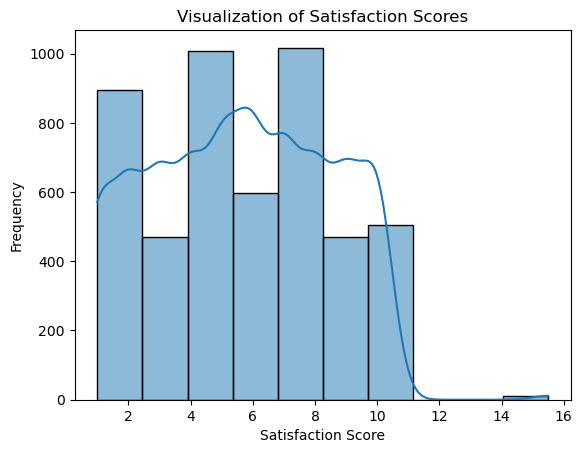

In [83]:
sns.histplot(customer_data['Satisfaction_Score'], kde=True, bins=10)
plt.title("Visualization of Satisfaction Scores")
plt.xlabel("Satisfaction Score")
plt.ylabel("Frequency")
plt.show()

In [84]:
cd = customer_data.groupby('Customer_ID').mean().sort_values(by="Satisfaction_Score", ascending = False)

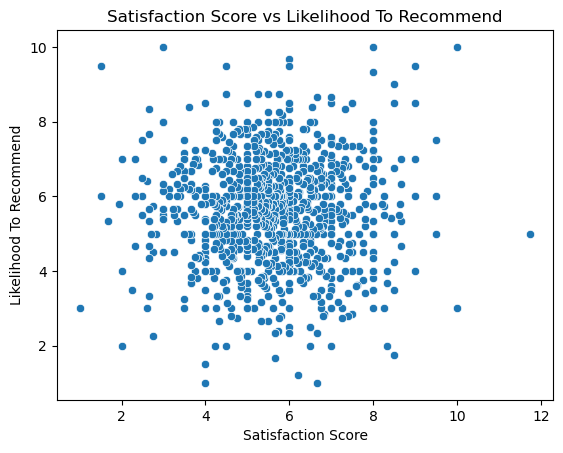

In [85]:
# Scatter plot for Satisfaction Score vs Likelihood To Recommend
sns.scatterplot(x='Satisfaction_Score', y='Likelihood_to_Recommend', data=cd)
plt.title("Satisfaction Score vs Likelihood To Recommend")
plt.xlabel("Satisfaction Score")
plt.ylabel("Likelihood To Recommend")
plt.show()

## PRODUCT OFFERING

In [87]:
product_data.head()

,Product_ID,Product_Name,Product_Type,Risk_Level,Target_Age_Group,Target_Income_Group
0,1,Platinum Credit Card,Credit Card,Medium,Unknown,Medium
1,2,Gold Savings Account,Savings Account,Low,Unknown,Low
2,3,High-Yield Investment Account,Investment,High,Unknown,High
3,4,Mortgage Loan,Loan,Medium,Unknown,High
4,5,Auto Loan,Loan,Medium,Unknown,Medium


In [88]:
product_data.isnull().sum()

Product_ID             0
Product_Name           0
Product_Type           0
Risk_Level             0
Target_Age_Group       0
Target_Income_Group    0
dtype: int64

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd

C:\Users\benan\AppData\Local\Temp\ipykernel_3124\2964005413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Target_Age_Group', data=product_data, palette='viridis')


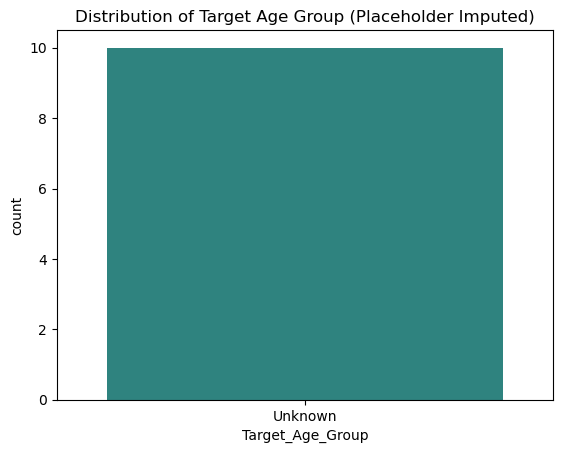

In [90]:
##Check the distribution of the Target Age Group

sns.countplot(x = 'Target_Age_Group', data=product_data, palette='viridis')
plt.title('Distribution of Target Age Group (Placeholder Imputed)')
plt.show()

## TRANSACTION DATA

In [118]:
df_drop_duplicates.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type
0,1,393,2023-01-01 00:00:00,3472.000000,Purchase
1,2,826,2023-01-01 01:00:00,3094.726465,Bill Payment
2,3,916,2023-01-01 02:00:00,10.000000,Purchase
3,4,109,2023-01-01 03:00:00,72.000000,Investment
4,5,889,2023-01-01 04:00:00,1793.000000,Investment


In [120]:
##Check again if there is missing data

df_drop_duplicates.isnull().sum()

Transaction_ID        0
Customer_ID           0
Transaction_Date      0
Transaction_Amount    0
Transaction_Type      0
dtype: int64

In [122]:
##Count of Unique Values

df_drop_duplicates.nunique()

Transaction_ID        5000
Customer_ID            993
Transaction_Date      5000
Transaction_Amount    3175
Transaction_Type         4
dtype: int64

<Figure size 1000x800 with 0 Axes>

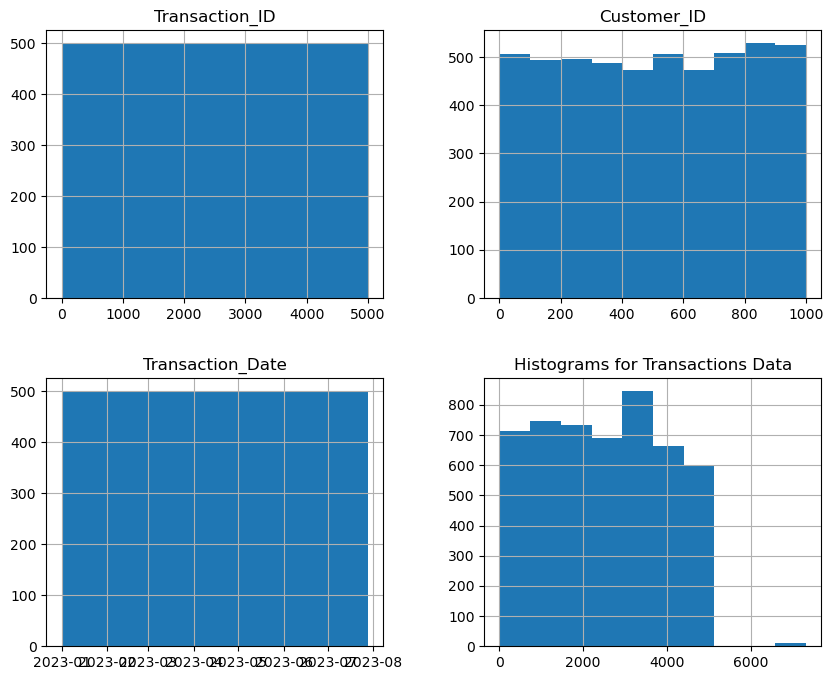

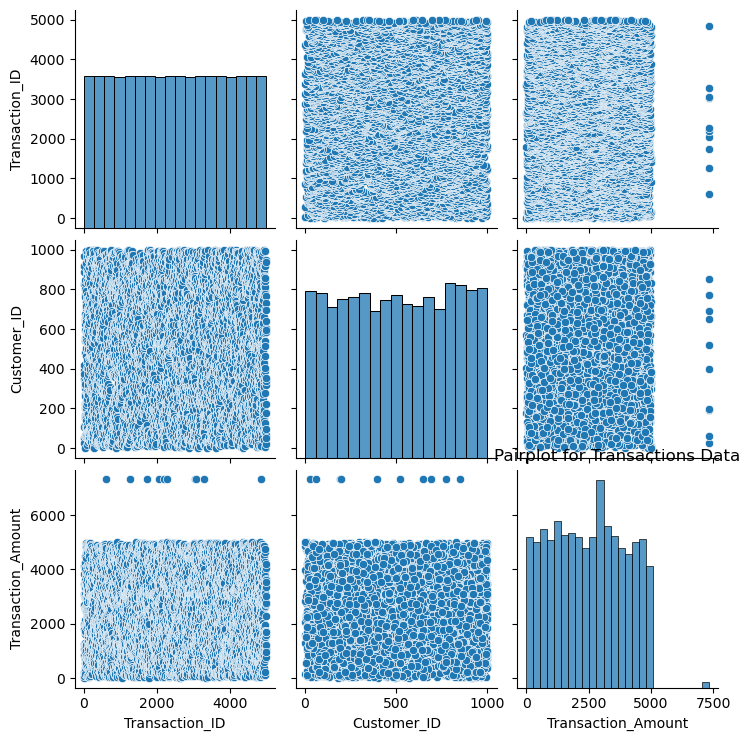

ValueError: could not convert string to float: 'Purchase'

In [124]:
df_drop_duplicates.hist(figsize=(10, 8))
plt.title('Histograms for Transactions Data')
plt.show()

# Pairplot to examine relationships between features in transactions_data
sns.pairplot(df_drop_duplicates.select_dtypes(include=[np.number]))
plt.title('Pairplot for Transactions Data')
plt.show()

# Visualizing correlations between numerical columns in transactions_data
plt.figure(figsize=(10, 8))
sns.heatmap(df_drop_duplicates.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap for Transactions Data')
plt.show()

## **3RD STEP: FEATURE ENGINEERING**

## CUSTOMER DATA

**AVERAGE SATISFACTION SCORE**

**Its Relevance to the Goal of Finmarks Corporation:** 
- The average satisfaction score will indicate the overall customer satisfaction.
- High score = customers are pleased with product
- Low score = customers are not satisfied with product

In [154]:
# compute average satisfaction score for each customer
avg_satisfaction = customer_data.groupby('Customer_ID')['Satisfaction_Score'].mean().reset_index()
avg_satisfaction.columns = ['Customer_ID', 'Average_Satisfaction_Score']

# compute average likelihood to recommend score for each customer
avg_recommend = customer_data.groupby('Customer_ID')['Likelihood_to_Recommend'].mean().reset_index()
avg_recommend.columns = ['Customer_ID', 'Average_Likelihood_to_Recommend']

# show the aggregated scores
aggregated_scores = pd.merge(avg_satisfaction, avg_recommend, on='Customer_ID')

print(aggregated_scores)

     Customer_ID  Average_Satisfaction_Score  Average_Likelihood_to_Recommend
0              1                    8.500000                         9.000000
1              2                    4.333333                         5.000000
2              3                    8.333333                         3.666667
3              4                    5.500000                         3.333333
4              5                    6.444444                         5.666667
..           ...                         ...                              ...
995          996                    9.000000                         8.500000
996          997                    5.600000                         7.400000
997          998                    5.222222                         5.000000
998          999                    6.736957                         6.800000
999         1000                    4.250000                         8.000000

[1000 rows x 3 columns]


In [156]:
##merge it with the original data frame
featured_customer_data = pd.merge(aggregated_scores, customer_data)

In [158]:
print(featured_customer_data)

      Customer_ID  Average_Satisfaction_Score  \
0               1                    8.500000   
1               1                    8.500000   
2               2                    4.333333   
3               2                    4.333333   
4               2                    4.333333   
...           ...                         ...   
4964          999                    6.736957   
4965         1000                    4.250000   
4966         1000                    4.250000   
4967         1000                    4.250000   
4968         1000                    4.250000   

      Average_Likelihood_to_Recommend  Satisfaction_Score  Feedback_Comments  \
0                                 9.0                10.0                  4   
1                                 9.0                 7.0                  1   
2                                 5.0                 3.0                  4   
3                                 5.0                 7.0                  3   
4          

## PRODUCT OFFERING

**PURCHASE COUNT FROM CUSTOMER**

In [ ]:
##

## TRANSACTION DATA

**The preferred transaction type of each customer**
- This will help us to analyze the behaviour patterns of each customer, based on their transaction type. 

In [149]:
##Specifies their preferred transaction type by unique customer id

pref_tran_type = df_drop_duplicates.groupby(['Customer_ID', 'Transaction_Type']).size().reset_index(name='Count')
pref_tran_type = pref_tran_type.sort_values(by=['Customer_ID', 'Count'], ascending=[True, False])
pref_tran_type = pref_tran_type.drop_duplicates(subset='Customer_ID', keep='first')
pref_tran_type = pref_tran_type[['Customer_ID', 'Transaction_Type']]
pref_tran_type.columns = ['Unique_Customer_ID', 'Preferred_Transaction_Type']

print(pref_tran_type)

      Unique_Customer_ID Preferred_Transaction_Type
0                      1               Bill Payment
4                      2               Bill Payment
6                      3               Bill Payment
7                      4               Loan Payment
9                      5               Bill Payment
...                  ...                        ...
2851                 996                 Investment
2854                 997                 Investment
2856                 998               Bill Payment
2861                 999                 Investment
2864                1000               Loan Payment

[993 rows x 2 columns]


## MERGE

**==========================**

**Merge Transaction and Customer Data**

In [ ]:
##merge lang yung transaction data and customer offering


In [ ]:
##EDA AND FEATURE ENGINEERING
##MERGE DATA